Score for train data =  0.7331364834822229


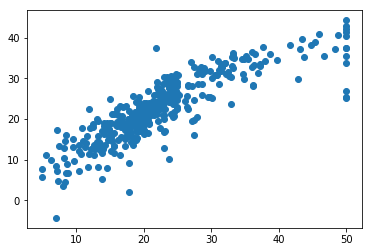

In [12]:
from sklearn import datasets
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
def step_gradient(x_train,y_train,lr,m) :
    m_slope = []
    v = len(x_train[0])
    m_slope = np.zeros(v,dtype = float)
    M = len(x_train)
    for i in range(M) :
        x = x_train[i]
        y = y_train[i]
        m_slope += (-2/M)*((y-(m*x).sum())*x)
    new_m = m - (lr*m_slope)
    return new_m

def cost(x_train,y_train,m) :
    tot_cost = 0
    M = len(x_train) 
    for i in range(M) :
        tot_cost += (1/M)*((y_train[i]-(m*x_train[i]).sum())**2)
    return tot_cost.sum()

def gd_algo(x_train,y_train) :
    lr = 0.13
    num_it = 300
    v = len(x_train[0])
    m=np.zeros(v,dtype =float)
    for i in range(num_it) :
        m = step_gradient(x_train,y_train,lr,m)
       # print(i , "Total cost = ", cost(data,m))
    return m

def score(y_truth, y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v

def predict(x ,coeff) :
    y_pred = np.sum(coeff*x,axis = 1)
    return y_pred
    
def gradient_descent(train_data,test_data) : 
    
    # dividing data into x and y
    x_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    x_test = test_data
    
    #scaling the data
    scaler  = preprocessing.StandardScaler()
    scaler.fit(x_train)
    train_data = scaler.transform(x_train)
    test_data = scaler.transform(test_data)
    
    # insert one column with all 1 values for finding c in coefficients
    x_train =np.insert(x_train,len(x_train[0]),1,axis =1)
    x_test =np.insert(x_test,len(test_data[0]),1,axis =1)
    
    # finding coefficients using gd_algo function
    coeff = gd_algo(x_train, y_train)
    
    # finding y_pred for training data and analyzing it using score and matplot
    y_pred_train = predict(x_train,coeff)
    print("Score for train data = " ,score(y_train,y_pred_train))
    plt.scatter(y_train,y_pred_train)
    plt.show()
    
    # finding y_predicted for test_data and saving it into csv file
    #np.savetxt('predict_final.csv', y_pred, delimiter=',')

def run() :
    
     # we are loading both train and test data from csv files
     train_data = np.loadtxt("boston_x_y_train.csv",delimiter = ",")
     test_data = np.loadtxt("boston_x_test.csv",delimiter = ",")
        
     gradient_descent(train_data,test_data)
run()